## Generating lightcurves

This notebook shows how to create lightcurves using the custom tools in the package and how to do so using already downloaded data *without* the `Observation` class.

Be sure that the `aia_lightcurves` package is installed or otherwise, somehow seen by the `PYTHONPATH` system variable.

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.time import Time
from regions import CircleSkyRegion

from aia_lightcurves import file_io, plotting, lightcurves, data_classes

%matplotlib inline

### Gathering local data

You can use the `file_io.obtain_files` method to collect the files of interest.
This method is general purpose in that it will obtain them if they're available locally or download them if they are not.
You can also specify level 1.5 if you would like that level of data.
The `fits_dir` parameter specifies the directory containing the files, the `time_range` parameter specifies the time range of interest using Astropy `Time` objects, and the `wavelength` parameter specifies the desired wavelength using Astropy units.

In [2]:
fits_dir = 'data/20220603/fits/'
time_range = Time((
    '2022-06-03 21:50:00.0',
    '2022-06-03 21:51:00.0'
))
wavelength = 171 * u.Angstrom

files = file_io.obtain_files(time_range, wavelengths=[wavelength], level=1)

We next need to specify the region of interest using the `RegionCanister` class.
Here we use the `CircleSkyRegion`, but any `SkyRegion` subclass from Astropy `regions` will work.

In [3]:
region = data_classes.RegionCanister(
    CircleSkyRegion,
    (250, 400) * u.arcsec,
    dict(radius = 200 * u.arcsec)
)

We can then make the `Lightcurve` object from the found files using `lightcurve.make_lightcurve`.

In [4]:
lightcurve = lightcurves.make_lightcurve(files, region)

And plot it using `plotting.plot_lightcurve`.

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

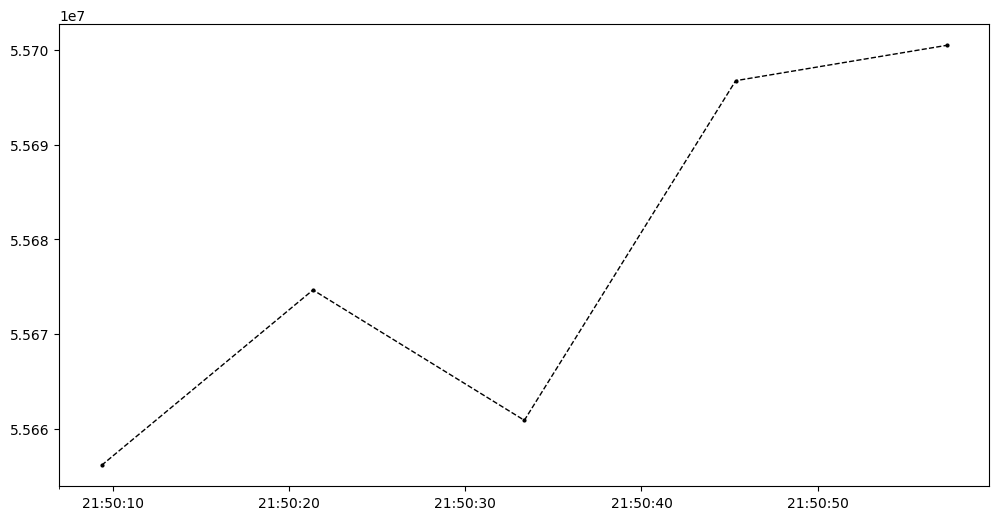

In [5]:
fig, ax = plt.subplots(figsize=(12,6))

plotting.plot_lightcurve(lightcurve, fig=fig, ax=ax)

We can also make summary plots showing the lightcurve normalized by frame exposure time using `plotting.summary_lightcurves`.

{'fig': <Figure size 4320x2400 with 3 Axes>,
 'raw_ax': <Axes: ylabel='Unnormalized light curve [arb]'>,
 'norm_ax': <Axes: ylabel='Normalized light curve [arb / sec]'>,
 'exp_ax': <Axes: ylabel='Exposure time per frame [s]'>}

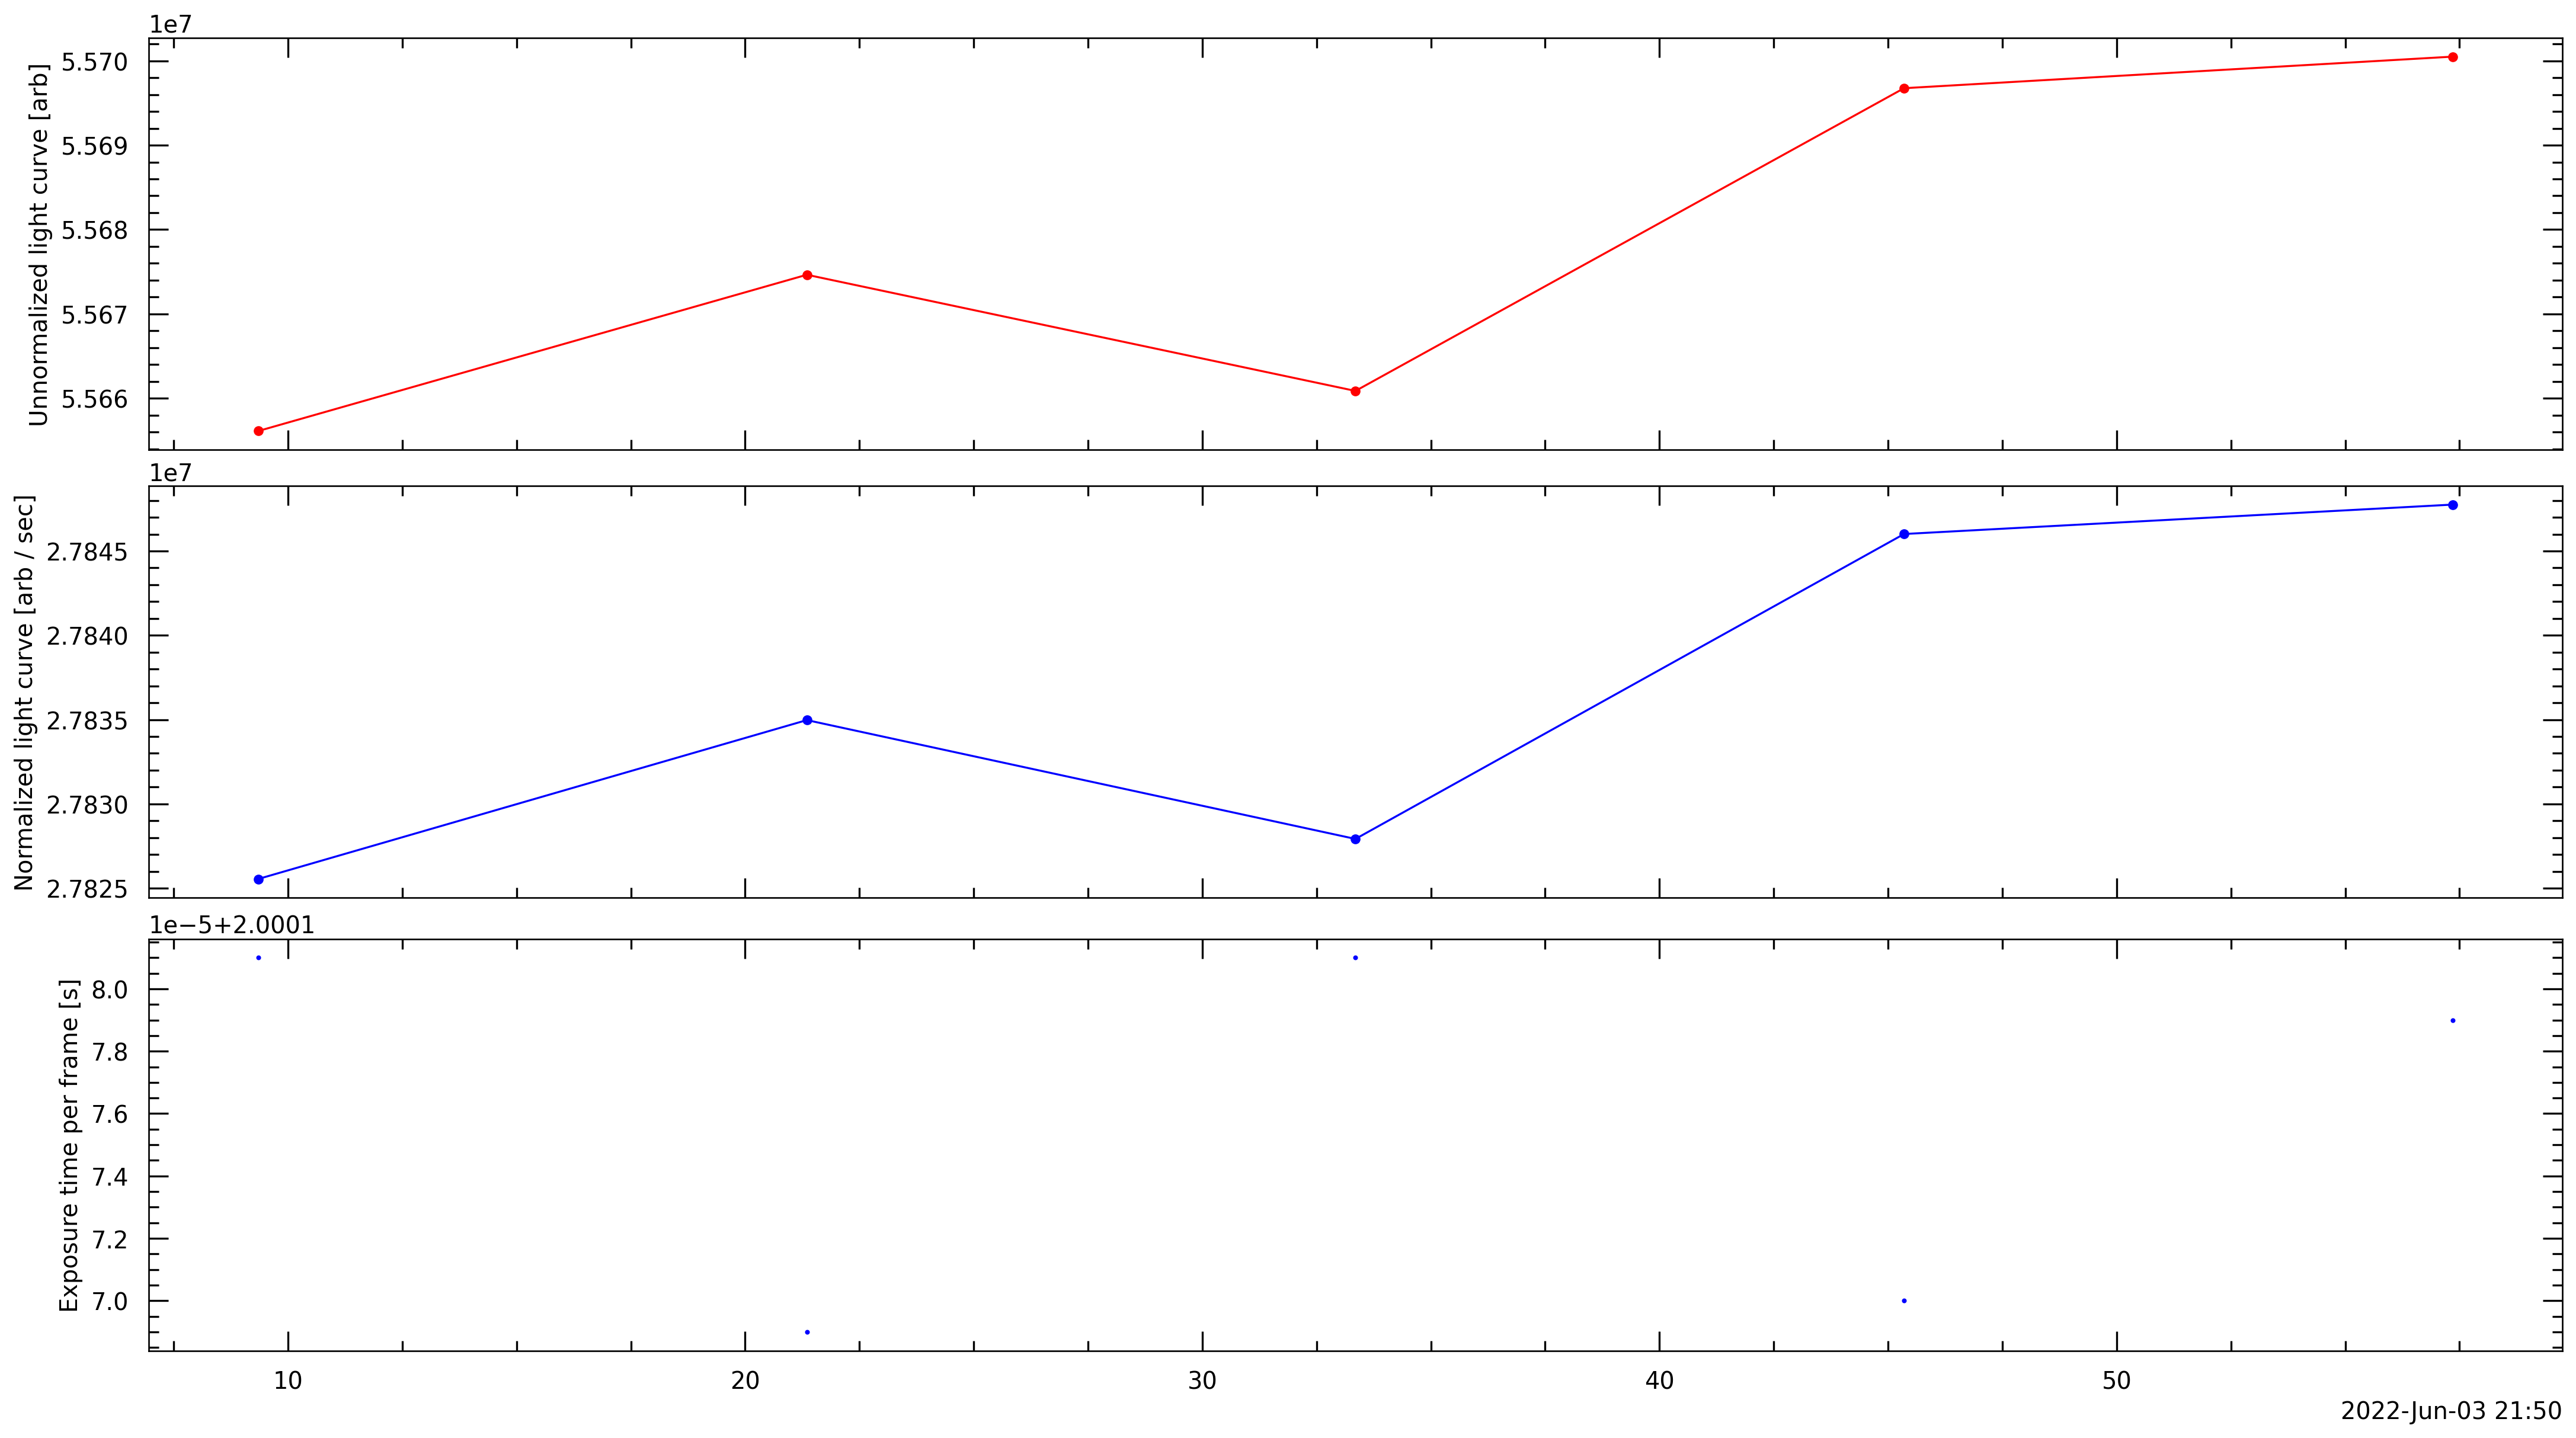

In [6]:
plotting.summary_lightcurves(lightcurve)